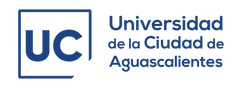

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

**¿Por qué estudiar Estadística?**
La estadística puede ser muy importante para una efectiva toma de decisiones. Existe una gran cantidad de valiosa información escondida entre los datos, pero esta información no suele ser fácilmente accesible, la estadística nos brinda los principios fundamentales que nos permiten extraer y entender esa información; tambien nos proporciona las herramientas necesarias para verificar la calidad de nuestros datos y nuestra información.

Existen 2 tipos de Estadística:

Estadística Descriptiva
Estadística Inferencial

## Conociendo la base de datos

In [1]:
import pandas as pd

df = pd.read_csv("s02_base.csv")
df.head(10)

# Color de piel

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [2]:
df.dtypes

CodPostal         int64
Sexo              int64
Edad              int64
Color             int64
Años_Estudio      int64
Renta             int64
Altura          float64
dtype: object

0 = Femenino

1 = Masculino

## Estadistica Descriptiva

Se dedica a recolectar, ordenar, analizar y representar a un conjunto de datos, con el fin de describir apropiadamente sus características. Calcula los parámetros estadísticos que describen el conjunto estudiado. Algunas de las herramientas que utiliza son gráficos, distribuciones de frecuencias, medidas de centralización, medidas de posición, medidas de dispersión, entre otras.

### Distribuciones de frecuencia para una variable cualitativa

In [3]:
freq_sexo = df["Sexo"].value_counts()
freq_sexo

0    53250
1    23590
Name: Sexo, dtype: int64

In [4]:
#porcent_sexo = df["Sexo"].value_counts("normalize")
porcent_sexo = df["Sexo"].value_counts(normalize = True) *100
porcent_sexo

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [5]:
distr_frec_cualitativa = pd.DataFrame({"Frecuencia": freq_sexo, "Porcentaje": porcent_sexo})
distr_frec_cualitativa

,Frecuencia,Porcentaje
0,53250,69.299844
1,23590,30.700156


### Distribuciones de frecuencia para más de una variable cualitativa

In [6]:
df["Color"].unique()

array([8, 2, 4, 6, 0])

In [7]:
dict_sexo = {0:"Femenino", 1:"Masculino"}
dict_color = {0: "Europeo", 
              2: "Americano", 
              4: "Africano",
              6: "Asiatico",
              8: "Latino",
              9: "Otro"}

In [8]:
freq_sexo_categ = pd.crosstab(df.Sexo, df.Color) # 1er param filas 2do param columnas
freq_sexo_categ

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [9]:
#freq_sexo_categ = pd.crosstab(df.Sexo, df.Color, colnames=["a", "b"]) # 1er param filas 2do param columnas
freq_sexo_categ.rename(index = dict_sexo, inplace=True)
freq_sexo_categ.rename(columns = dict_color, inplace=True)
freq_sexo_categ

Color,Europeo,Americano,Africano,Asiatico,Latino
Sexo,,,,,
Femenino,256,22194,5502,235,25063
Masculino,101,9621,2889,117,10862


In [10]:
porcent_sexo_categ = pd.crosstab(df.Sexo, df.Color, normalize=True)*100
porcent_sexo_categ.rename(index = dict_sexo, inplace=True)
porcent_sexo_categ.rename(columns = dict_color, inplace=True)


porcent_sexo_categ["Subtotal Fila"] = porcent_sexo_categ.sum(axis=1)
porcent_sexo_categ.loc["Subtotal Columna"] = porcent_sexo_categ.sum()

porcent_sexo_categ

Color,Europeo,Americano,Africano,Asiatico,Latino,Subtotal Fila
Sexo,,,,,,
Femenino,0.333160,28.883394,7.160333,0.305830,32.617126,69.299844
Masculino,0.131442,12.520822,3.759761,0.152264,14.135867,30.700156
Subtotal Columna,0.464602,41.404217,10.920094,0.458095,46.752993,100.000000


In [11]:
renta = pd.crosstab(df.Sexo, df.Color, aggfunc="mean", values=df.Renta)
renta.rename(index=dict_sexo, inplace=True)
renta.rename(columns = dict_color, inplace=True)
renta

Color,Europeo,Americano,Africano,Asiatico,Latino
Sexo,,,,,
Femenino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Masculino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [12]:

estudio = pd.crosstab(df.Sexo, df.Color, aggfunc="mean", values=df.Años_Estudio)
estudio.rename(index=dict_sexo, inplace=True)
estudio.rename(columns=dict_color, inplace=True)
estudio

Color,Europeo,Americano,Africano,Asiatico,Latino
Sexo,,,,,
Femenino,7.875000,10.140353,8.514540,12.587234,8.329929
Masculino,9.108911,11.297578,9.522326,12.495726,9.520714


Podemos inferir que entre más años de estudio, gana más y paga más de renta

In [13]:
altura = pd.crosstab(df.Sexo, df.Color, aggfunc="mean", values=df.Altura)
altura.rename(index=dict_sexo, inplace=True)
altura.rename(columns=dict_color, inplace=True)
altura

Color,Europeo,Americano,Africano,Asiatico,Latino
Sexo,,,,,
Femenino,1.701357,1.699400,1.700704,1.695750,1.699219
Masculino,1.698907,1.700432,1.698065,1.702507,1.699398
